In [ ]:
# mengkoneksikan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import pandas as pd
import numpy as np
#from datetime import date
from IPython.display import Image
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
%ls

drive/  sample_data/


In [ ]:
# import dataset kedalam program python
event_df = pd.read_csv('drive/MyDrive/running-example.csv', sep=';', low_memory=False)

In [ ]:
# Melihat Ringkasan dataset
event_df.head()

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara


In [ ]:
# melihat bentuk pada dataset
print('{} rows and {} columns.'.format(event_df.shape[0], event_df.shape[1]))

42 rows and 5 columns.


In [ ]:
# melakukan pemilihan column yang digunakan dan membentuk dataset baru
events = event_df[['case_id', 'activity', 'timestamp']]

In [ ]:
# merubah nama colum yang digunakan pada dataset
events.rename(columns={'Case_id':'case',
                       'activity':'label',
                       'timestamp':'datetime'
                       }, inplace=True)

In [ ]:
# melihat ringkasan dataset
events.head()

,case_id,label,datetime
0,3,register request,2010-12-30 14:32:00+01:00
1,3,examine casually,2010-12-30 15:06:00+01:00
2,3,check ticket,2010-12-30 16:34:00+01:00
3,3,decide,2011-01-06 09:18:00+01:00
4,3,reinitiate request,2011-01-06 12:18:00+01:00


In [ ]:
# melihat type data pada dataset
events.dtypes

case_id      int64
label       object
datetime    object
dtype: object

In [ ]:
# merubah type data pada colum case menjadi string (object)
events['case_id'] = events.astype(str)

In [ ]:
# merubah type data pada column datetime menjadi datetime
events['datetime'] = pd.to_datetime(events['datetime'])

In [ ]:
# melihat type data pada dataset
events.dtypes

case_id                                   object
label                                     object
datetime    datetime64[ns, pytz.FixedOffset(60)]
dtype: object

In [ ]:
# melakukan pengecekan missing value pada dataset
events.isna().sum()

case_id     0
label       0
datetime    0
dtype: int64

In [ ]:
events.head()

,case_id,label,datetime
0,3,register request,2010-12-30 14:32:00+01:00
1,3,examine casually,2010-12-30 15:06:00+01:00
2,3,check ticket,2010-12-30 16:34:00+01:00
3,3,decide,2011-01-06 09:18:00+01:00
4,3,reinitiate request,2011-01-06 12:18:00+01:00


In [ ]:
# Installasi modul PM4PY
!pip install pm4py

     |████████████████████████████████| 1.5 MB 9.9 MB/s 
     |████████████████████████████████| 40.6 MB 73 kB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23592 sha256=7073cd2af8b474281e88097c025764b9cc7eceb8a30647c484a6c35a3bc4466f
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist


In [ ]:
events.rename(columns={'datetime': 'time:timestamp', 'case_id': 'case:concept:name', 'label': 'concept:name'}, inplace=True)

In [ ]:
from pm4py.algo.filtering.pandas.start_activities import start_activities_filter
log_start = start_activities_filter.get_start_activities(events)
df_start_activities = start_activities_filter.apply(events, ["register request"])

In [ ]:
print(events)

   case:concept:name        concept:name            time:timestamp
0                  3    register request 2010-12-30 14:32:00+01:00
1                  3    examine casually 2010-12-30 15:06:00+01:00
2                  3        check ticket 2010-12-30 16:34:00+01:00
3                  3              decide 2011-01-06 09:18:00+01:00
4                  3  reinitiate request 2011-01-06 12:18:00+01:00
5                  3  examine thoroughly 2011-01-06 13:06:00+01:00
6                  3        check ticket 2011-01-08 11:43:00+01:00
7                  3              decide 2011-01-09 09:55:00+01:00
8                  3    pay compensation 2011-01-15 10:45:00+01:00
9                  2    register request 2010-12-30 11:32:00+01:00
10                 2        check ticket 2010-12-30 12:12:00+01:00
11                 2    examine casually 2010-12-30 14:16:00+01:00
12                 2              decide 2011-01-05 11:22:00+01:00
13                 2    pay compensation 2011-01-08 12:05:00+0

In [ ]:
df_start_activities

,case:concept:name,concept:name,time:timestamp
0,3,register request,2010-12-30 14:32:00+01:00
1,3,examine casually,2010-12-30 15:06:00+01:00
2,3,check ticket,2010-12-30 16:34:00+01:00
3,3,decide,2011-01-06 09:18:00+01:00
4,3,reinitiate request,2011-01-06 12:18:00+01:00
5,3,examine thoroughly,2011-01-06 13:06:00+01:00
6,3,check ticket,2011-01-08 11:43:00+01:00
7,3,decide,2011-01-09 09:55:00+01:00
8,3,pay compensation,2011-01-15 10:45:00+01:00
9,2,register request,2010-12-30 11:32:00+01:00


In [ ]:
from pm4py.algo.filtering.pandas.end_activities import end_activities_filter
end_activities = end_activities_filter.get_end_activities(df_start_activities)
filtered_df = end_activities_filter.apply(df_start_activities, ["pay compensation"])

In [ ]:
filtered_df

,case:concept:name,concept:name,time:timestamp
0,3,register request,2010-12-30 14:32:00+01:00
1,3,examine casually,2010-12-30 15:06:00+01:00
2,3,check ticket,2010-12-30 16:34:00+01:00
3,3,decide,2011-01-06 09:18:00+01:00
4,3,reinitiate request,2011-01-06 12:18:00+01:00
5,3,examine thoroughly,2011-01-06 13:06:00+01:00
6,3,check ticket,2011-01-08 11:43:00+01:00
7,3,decide,2011-01-09 09:55:00+01:00
8,3,pay compensation,2011-01-15 10:45:00+01:00
9,2,register request,2010-12-30 11:32:00+01:00


In [ ]:
from pm4py.statistics.traces.generic.pandas import case_statistics
variants_count = case_statistics.get_variant_statistics(filtered_df)
variants_count = sorted(variants_count, key=lambda x: x['case:concept:name'], reverse=True)

In [ ]:
variants_count

[{'case:concept:name': 1,
  'variant': 'register request,examine casually,check ticket,decide,reinitiate request,examine thoroughly,check ticket,decide,pay compensation'},
 {'case:concept:name': 1,
  'variant': 'register request,examine casually,check ticket,decide,pay compensation'},
 {'case:concept:name': 1,
  'variant': 'register request,check ticket,examine casually,decide,pay compensation'}]

In [ ]:
df = pd.DataFrame(variants_count)

In [ ]:
df

,variant,case:concept:name
0,"register request,examine casually,check ticket...",1
1,"register request,examine casually,check ticket...",1
2,"register request,check ticket,examine casually...",1


In [ ]:
from pm4py.objects.conversion.log import converter as log_converter

# mengkonversi dataset csv kedalam bentuk format log XES
log = log_converter.apply(filtered_df)

In [ ]:
log

[{'attributes': {'concept:name': '3'}, 'events': [{'concept:name': 'register request', 'time:timestamp': Timestamp('2010-12-30 14:32:00+0100', tz='pytz.FixedOffset(60)')}, '..', {'concept:name': 'pay compensation', 'time:timestamp': Timestamp('2011-01-15 10:45:00+0100', tz='pytz.FixedOffset(60)')}]}, '....', {'attributes': {'concept:name': '6'}, 'events': [{'concept:name': 'register request', 'time:timestamp': Timestamp('2011-01-06 15:02:00+0100', tz='pytz.FixedOffset(60)')}, '..', {'concept:name': 'pay compensation', 'time:timestamp': Timestamp('2011-01-16 11:47:00+0100', tz='pytz.FixedOffset(60)')}]}]

In [81]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  """


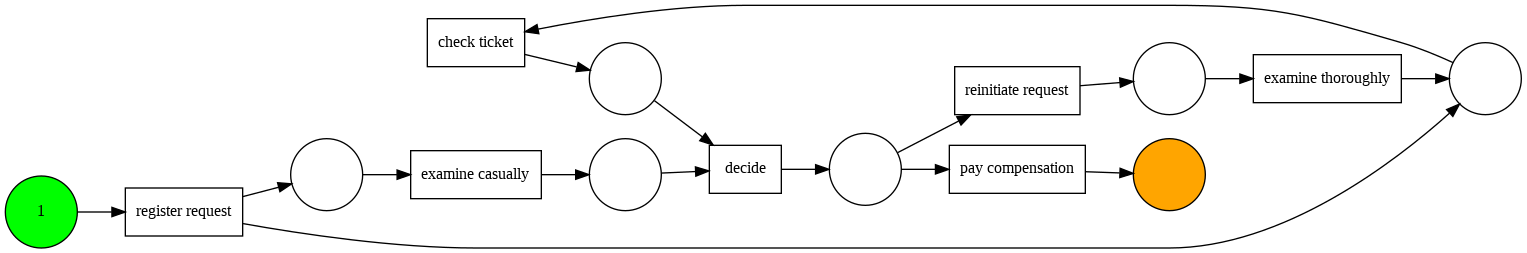

ValueError: ignored

In [82]:
# create Alpha_Miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
Image(pn_visualizer.view(gviz))

In [79]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

net, initial_marking, final_marking = inductive_miner.apply(log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  """


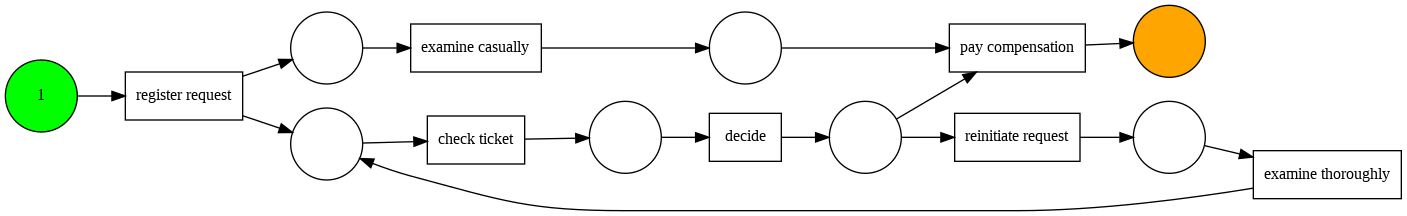

ValueError: ignored

In [80]:
# create the Inductive_miner
tree = inductive_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
Image(pn_visualizer.view(gviz))

In [ ]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(log, net, initial_marking, final_marking)
replayed_traces

replaying log with TBR, completed variants ::   0%|          | 0/3 [00:00<?, ?it/s]

[{'activated_transitions': [register request,
   examine casually,
   check ticket,
   decide,
   reinitiate request,
   examine thoroughly,
   check ticket,
   decide,
   pay compensation],
  'consumed_tokens': 12,
  'enabled_transitions_in_marking': set(),
  'missing_tokens': 1,
  'produced_tokens': 11,
  'reached_marking': Marking({end: 1}),
  'remaining_tokens': 0,
  'trace_fitness': 0.9583333333333333,
  'trace_is_fit': False,
  'transitions_with_problems': [decide]},
 {'activated_transitions': [register request,
   check ticket,
   examine casually,
   decide,
   pay compensation],
  'consumed_tokens': 7,
  'enabled_transitions_in_marking': set(),
  'missing_tokens': 0,
  'produced_tokens': 7,
  'reached_marking': Marking({end: 1}),
  'remaining_tokens': 0,
  'trace_fitness': 1.0,
  'trace_is_fit': True,
  'transitions_with_problems': []},
 {'activated_transitions': [register request,
   examine casually,
   check ticket,
   decide,
   pay compensation],
  'consumed_tokens': 7,
 

In [ ]:
trace = pd.DataFrame(replayed_traces, 
                     columns=['activated_transitions',
                              'produced_tokens',
                              'consumed_tokens',
                              'remaining_tokens',
                              'missing_tokens',
                              'trace_fitness',
                              'trace_is_fit'
                              ]
                     )

In [ ]:
trace

,activated_transitions,produced_tokens,consumed_tokens,remaining_tokens,missing_tokens,trace_fitness,trace_is_fit
0,"[register request, examine casually, check tic...",11,12,0,1,0.958333,False
1,"[register request, check ticket, examine casua...",7,7,0,0,1.000000,True
2,"[register request, examine casually, check tic...",7,7,0,0,1.000000,True


In [ ]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness = replay_fitness_evaluator.apply(log, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
fitness

replaying log with TBR, completed variants ::   0%|          | 0/3 [00:00<?, ?it/s]

{'average_trace_fitness': 0.986111111111111,
 'log_fitness': 0.9807692307692308,
 'perc_fit_traces': 66.66666666666667,
 'percentage_of_fitting_traces': 66.66666666666667}

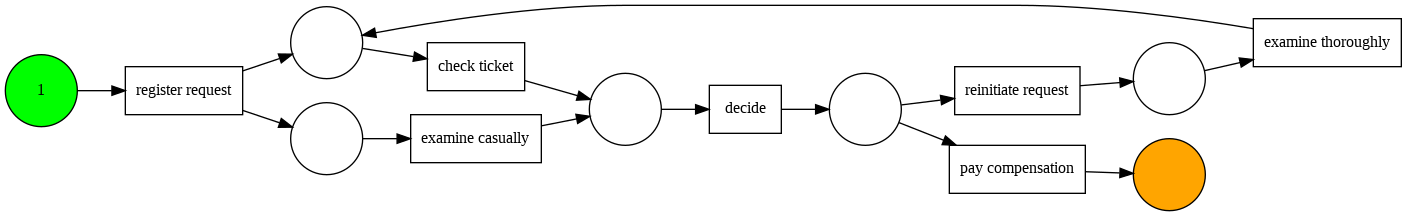

ValueError: ignored

In [ ]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
Image(pn_visualizer.view(gviz))

replaying log with TBR, completed variants ::   0%|          | 0/3 [00:00<?, ?it/s]

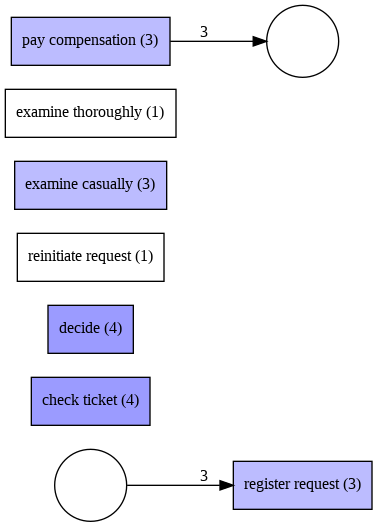

ValueError: ignored

In [ ]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

img = pn_visualizer.view(gviz)
Image(img)